In [1]:
import pandas as pd
from sqlalchemy import create_engine
import dbcred

In [2]:
f1dburl = "postgresql://" + dbcred.cred + "/f1db"

In [3]:
sqlF1KR = '''
SELECT
CONCAT(d.driver_surname, ', ', d.driver_forename) AS driver
, ra.year
, con.constructor_name AS constructor
, ra.races_name AS race
, c.circuit_name AS circuit
, re.results_position AS final_classification
, s.status
FROM races AS ra 
INNER JOIN results AS re USING (raceid) 
INNER JOIN constructors AS con USING (constructorid) 
INNER JOIN drivers AS d USING (driverid) 
INNER JOIN circuits AS c USING (circuitid) 
INNER JOIN status AS s USING (statusid) 
WHERE re.driverid= 8
GROUP BY ra.year
, con.constructor_name
, ra.races_name
, d.driver_surname
, d.driver_forename
, c.circuit_name
, re.results_position
, s.status
ORDER BY 2;
'''

engine = create_engine(f1dburl)

In [4]:
dfKR = pd.read_sql(sqlF1KR, engine)
dfKR.head()

,driver,year,constructor,race,circuit,final_classification,status
0,"Räikkönen, Kimi",2001,Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,6.0,Finished
1,"Räikkönen, Kimi",2001,Sauber,Austrian Grand Prix,A1-Ring,4.0,Finished
2,"Räikkönen, Kimi",2001,Sauber,Belgian Grand Prix,Circuit de Spa-Francorchamps,NaN,Transmission
3,"Räikkönen, Kimi",2001,Sauber,Brazilian Grand Prix,Autódromo José Carlos Pace,NaN,Spun off
4,"Räikkönen, Kimi",2001,Sauber,British Grand Prix,Silverstone Circuit,5.0,+1 Lap


In [5]:
mKR1 = dfKR["final_classification"] == 1
dfKR[mKR1]

,driver,year,constructor,race,circuit,final_classification,status
45,"Räikkönen, Kimi",2003,McLaren,Malaysian Grand Prix,Sepang International Circuit,1.0,Finished
52,"Räikkönen, Kimi",2004,McLaren,Belgian Grand Prix,Circuit de Spa-Francorchamps,1.0,Finished
70,"Räikkönen, Kimi",2005,McLaren,Belgian Grand Prix,Circuit de Spa-Francorchamps,1.0,Finished
73,"Räikkönen, Kimi",2005,McLaren,Canadian Grand Prix,Circuit Gilles Villeneuve,1.0,Finished
78,"Räikkönen, Kimi",2005,McLaren,Hungarian Grand Prix,Hungaroring,1.0,Finished
80,"Räikkönen, Kimi",2005,McLaren,Japanese Grand Prix,Suzuka Circuit,1.0,Finished
82,"Räikkönen, Kimi",2005,McLaren,Monaco Grand Prix,Circuit de Monaco,1.0,Finished
84,"Räikkönen, Kimi",2005,McLaren,Spanish Grand Prix,Circuit de Barcelona-Catalunya,1.0,Finished
85,"Räikkönen, Kimi",2005,McLaren,Turkish Grand Prix,Istanbul Park,1.0,Finished
105,"Räikkönen, Kimi",2007,Ferrari,Australian Grand Prix,Albert Park Grand Prix Circuit,1.0,Finished


<AxesSubplot:>

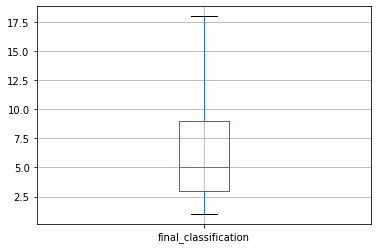

In [6]:
dfKR.boxplot(column='final_classification')

array([[<AxesSubplot:title={'center':'final_classification'}>]],
      dtype=object)

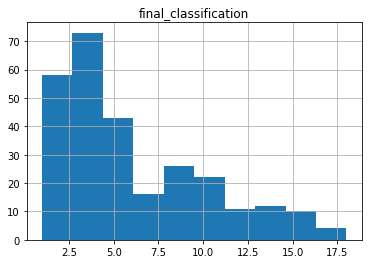

In [7]:
dfKR.hist(column='final_classification')

<AxesSubplot:title={'center':'Kimi Räikkönen lap times, Malaysian Grand Prix, 2003'}, xlabel='lap'>

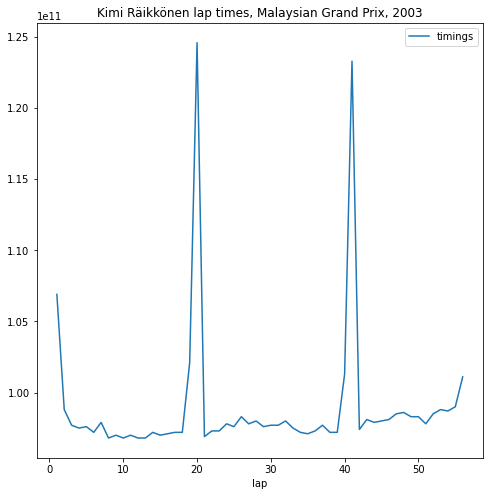

In [8]:
sqlKRMal03 = '''
SELECT
lap
, to_char(lap_times_time, 'HH24:MI:SS.FF1') AS timings
FROM lap_times
WHERE raceid= 109
AND driverid= 8
;
'''

dfKRMal03 = pd.read_sql(sqlKRMal03, engine)

dfKRMal03['timings']=pd.to_timedelta(pd.to_datetime(dfKRMal03['timings'],format='%H:%M:%S.%f').dt.strftime('%H:%M:%S.%f'))

dfKRMal03.plot.line(x='lap', y='timings', figsize = (8, 8), title = "Kimi Räikkönen lap times, Malaysian Grand Prix, 2003")